In [1]:
import numpy as np                  # type: ignore
import pandas as pd                 # type: ignore
import matplotlib.pyplot as plt     # type: ignore
import seaborn as sns               # type: ignore

sns.set_context('notebook')
sns.set_style('white')

from scipy.io import loadmat        # type: ignore
from sklearn import svm             # type: ignore

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

In [2]:
def plotData(X, y, S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    plt.scatter(X[pos, 0], X[pos, 1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg, 0], X[neg, 1], s=S, c='r', marker='o', linewidths=1)


# Function to plot SVC decision boundary
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plotData(X, y, 6)
    sv = svc.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='|', s=100, linewidths=2)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors:', svc.support_.size)

> ##  Example 1 :  **Linear SVM**

In [3]:
data1 = loadmat('ex6data1.mat')
print(data1)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011', '__version__': '1.0', '__globals__': [], 'X': array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  ,

In [4]:
X1 = data1['X']
y1 = data1['y']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


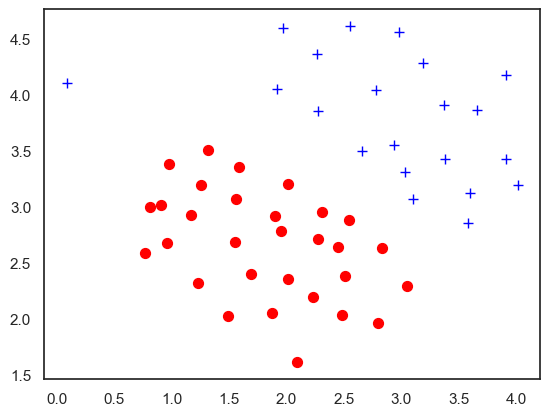

In [5]:
###---- data before classifying ----###
plotData(X1,y1,50)

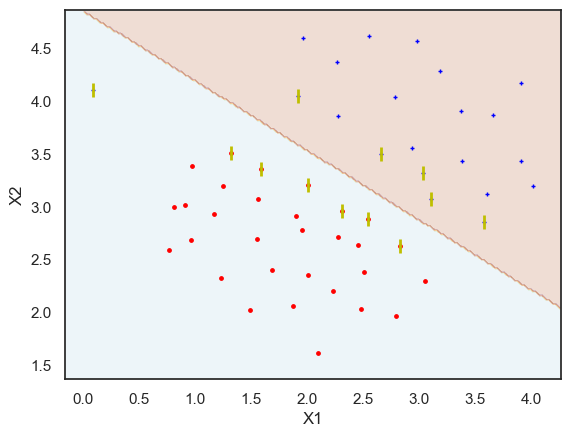

Number of support vectors: 12


In [6]:
## small C == UF
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())

# Plot the decision boundary and data points
plot_svc(clf, X1, y1)

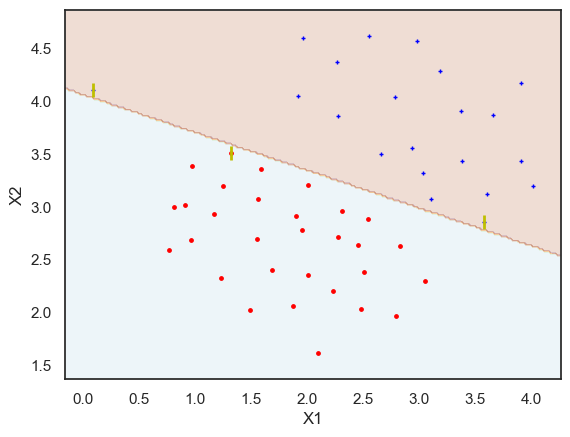

Number of support vectors: 3


In [7]:
# big C == OF
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
plot_svc(clf, X1, y1)

> ## Example 2 : **Nonlinear SVM**

In [8]:
data2 = loadmat('ex6data2.mat')
print(data2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [9]:
X2 = data2['X']
y2 = data2['y']

print('X2:', X2.shape)
print('y2:', y2.shape)

X2: (863, 2)
y2: (863, 1)


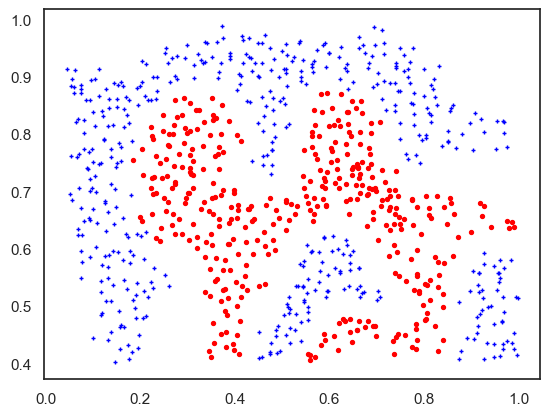

In [10]:
plotData(X2, y2,8)

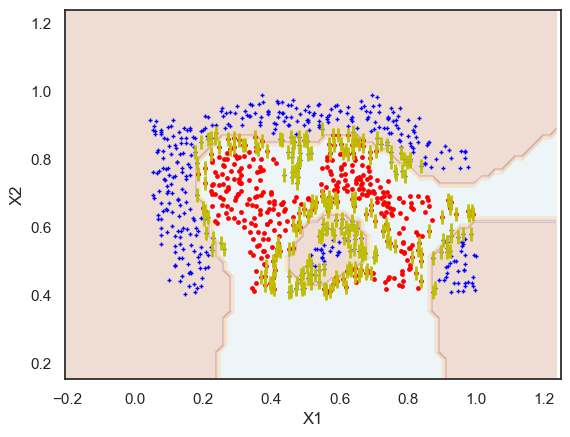

Number of support vectors: 254


In [11]:
# apply SVM
clf2 = svm.SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
plot_svc(clf2, X2, y2)

> ## Example 3 : **Nonlinear SVM**

In [12]:
data3 = loadmat('ex6data3.mat')
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [13]:
X3 = data3['X']
y3 = data3['y']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


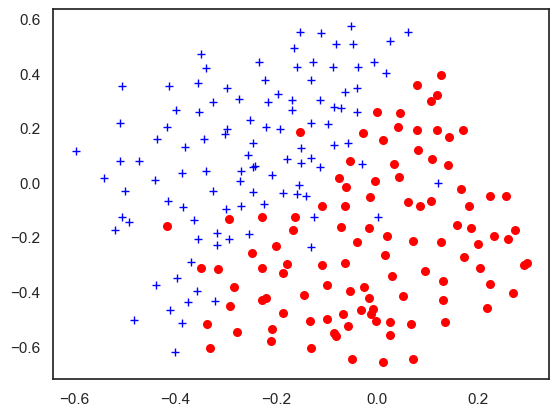

In [14]:
plotData(X3, y3,30)

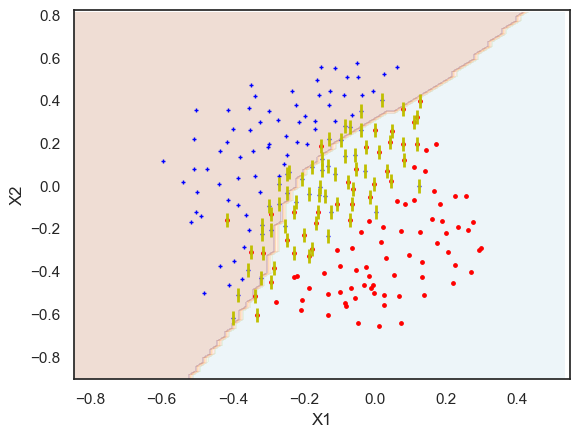

Number of support vectors: 78


In [15]:
clf3 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
plot_svc(clf3, X3, y3)

In [ ]:
spam_train = loadmat('spamTrain.mat')
spam_test  = loadmat('spamTest.mat')
print(spam_train.keys())
print(spam_test.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
dict_keys(['__header__', '__version__', '__globals__', 'Xtest', 'ytest'])


In [17]:
X = spam_train['X']
Xtest = spam_test['Xtest']

y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

print(f"X={X.shape}\ny={y.shape}\nXtest={Xtest.shape}\nytest={ytest.shape}")

X=(4000, 1899)
y=(4000,)
Xtest=(1000, 1899)
ytest=(1000,)


In [18]:
svc = svm.SVC()
svc.fit(X, y)

SVC()

In [19]:
print(f'Test accuracy = {np.round(svc.score(Xtest, ytest) * 100, 2)}%')

Test accuracy = 98.7%
